In [26]:
from liionpack.simulations import Age_SEI_simulation

In [27]:
#
# External thermal example
#

import liionpack as lp
import pybamm
import numpy as np
import matplotlib.pyplot as plt

plt.close("all")


# Generate the netlist
netlist = lp.setup_circuit(Np=4, Ns=1, Rb=1e-3, Rc=1e-2)

# Define some additional variables to output
output_variables = [
    "Discharge capacity [A.h]",
    #"Loss of lithium inventory [%]",
]

# Cycling experiment, using PyBaMM
experiment = pybamm.Experiment(
    [
        "Charge at 5 A for 30 minutes",
        "Rest for 15 minutes",
        "Discharge at 5 A for 30 minutes",
        "Rest for 30 minutes",
    ] * 100,
    period="10 seconds",
)

# PyBaMM battery parameters
parameter_values = pybamm.ParameterValues("Chen2020")

# Solve the pack problem
output = lp.solve(
    netlist=netlist,
    sim_func=Age_SEI_simulation,
    # inputs=inputs,
    parameter_values=parameter_values,
    experiment=experiment,
    # output_variables=output_variables,
    initial_soc=0.8,
)


Stepping simulation: 100%|██████████| 180/180 [00:08<00:00, 21.67it/s]


In [28]:
print(output.keys())

dict_keys(['Time [s]', 'Pack current [A]', 'Pack terminal voltage [V]', 'Pack power [W]', 'Cell current [A]', 'Node voltage [V]', 'Cell internal resistance [Ohm]', 'Terminal voltage [V]', 'Surface open-circuit voltage [V]'])


In [35]:
dir(output)
print(output['Pack current [A]'].shape)

(6301,)


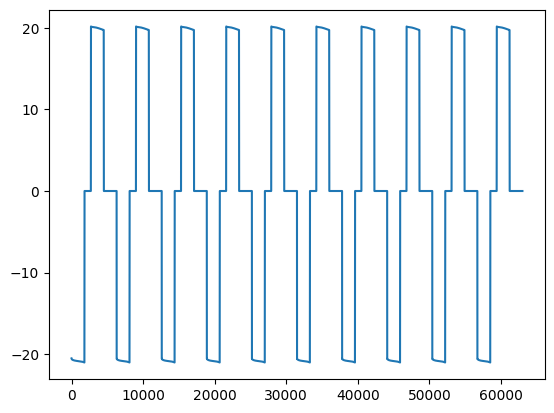

In [30]:
plt.plot(output["Time [s]"],output["Pack power [W]"])
plt.show()

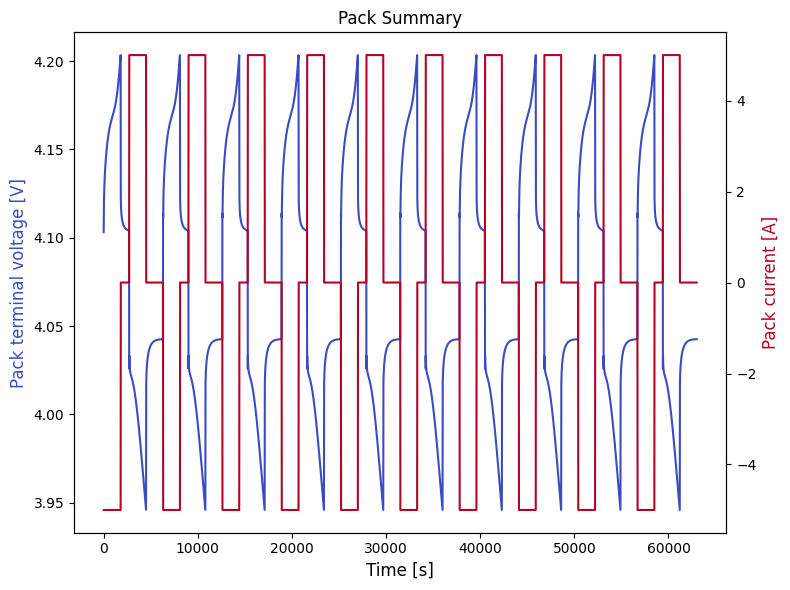

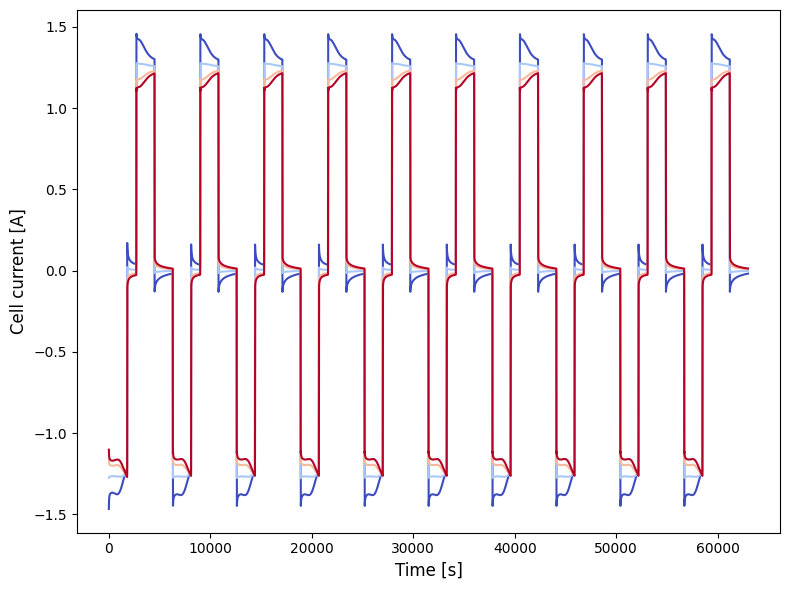

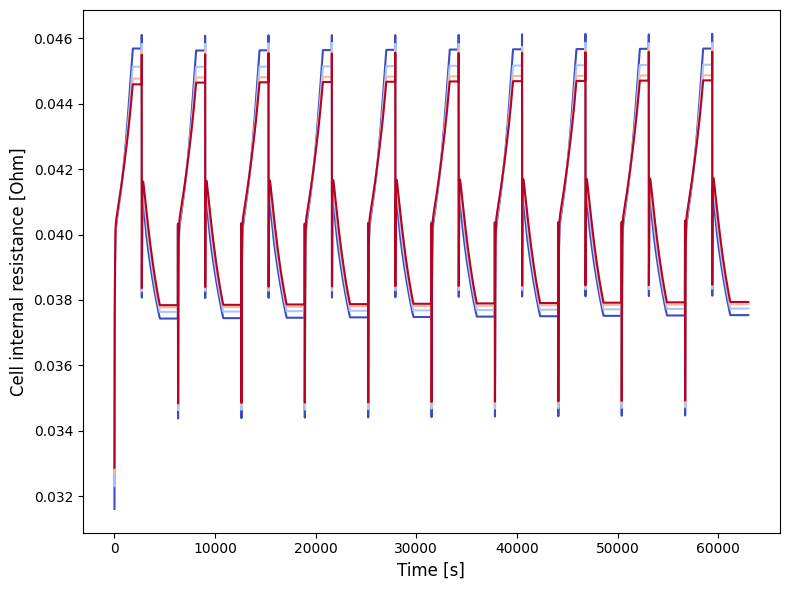

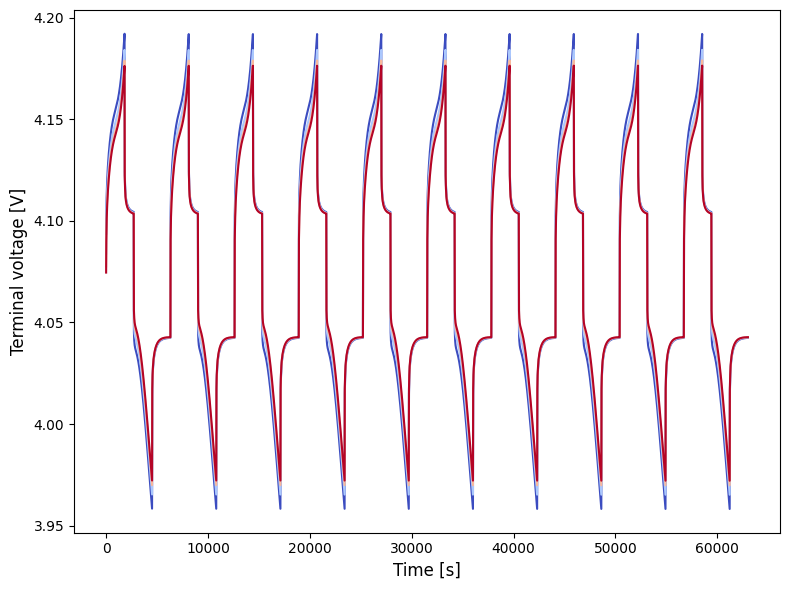

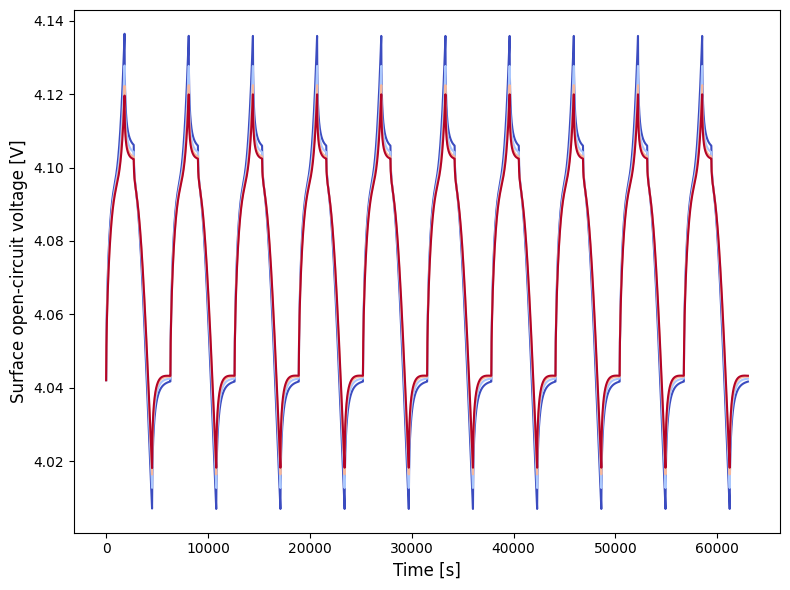

In [31]:
# Plot results
lp.plot_output(output, color="white")
lp.show_plots()